In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
import time
from sklearn.metrics import mean_squared_error
import os, psutil

import matplotlib.pyplot as plt

In [2]:
movie_file='ml-1m/movies.dat'
user_file = 'ml-1m/users.dat'
ratings_file = 'ml-1m/ratings.dat'
movies_table = pd.read_csv(movie_file, header=None, sep='::', names=['movie_ID','movie_name','movie_genre'],encoding = "ISO-8859-1")
users_table = pd.read_csv(user_file, header=None, sep='::', names = ['user_ID','gender','age','occupation','zipcode'])
ratings_table = pd.read_csv(ratings_file, header=None, sep='::', names = ['user_ID','movie_ID','rating','timestamp'])
data = (users_table, movies_table, ratings_table)

genres=['Action','Adventure','Animation','Children\'s','Comedy','Crime','Documentary','Drama','Fantasy'
        ,'Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']

/tmp/ipykernel_15175/1350757759.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies_table = pd.read_csv(movie_file, header=None, sep='::', names=['movie_ID','movie_name','movie_genre'],encoding = "ISO-8859-1")
/tmp/ipykernel_15175/1350757759.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  users_table = pd.read_csv(user_file, header=None, sep='::', names = ['user_ID','gender','age','occupation','zipcode'])
/tmp/ipykernel_15175/1350757759.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+

In [3]:
# create folder to store plots
if not os.path.exists('plots'):
    os.makedirs('plots')

if not os.path.exists('plots/tsne'):
    os.makedirs('plots/tsne')

if not os.path.exists('plots/umap'):
    os.makedirs('plots/umap')

if not os.path.exists('plots/pca'):
    os.makedirs('plots/pca')

# Loading the final results of Matrix Factorisation

In [4]:
M=np.load('M_1.npy').T

U=np.load('U_1.npy')



In [5]:
for i in range(len(movies_table)):
    try:
        movies_table['movie_genre'].iloc[i]=movies_table['movie_genre'].iloc[i].split('|')
    except:
        pass
    
    

/tmp/ipykernel_15175/2288004314.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_table['movie_genre'].iloc[i]=movies_table['movie_genre'].iloc[i].split('|')


In [6]:
year=np.empty(len(movies_table))
for i in range(len(movies_table)):
    year[i]=int(movies_table['movie_name'].iloc[i].split('(')[-1].split(')')[0])
    
movies_table['year']=year.tolist()

# T-SNE

In [7]:
from sklearn.manifold import TSNE

In [8]:
initial_t = time.time()

U_tsne = TSNE(n_components=2).fit_transform(U)

M_tsne = TSNE(n_components=2).fit_transform(M)


#initial_t = time.time()
print('TSNE time', time.time() - initial_t)

TSNE time 46.61144828796387


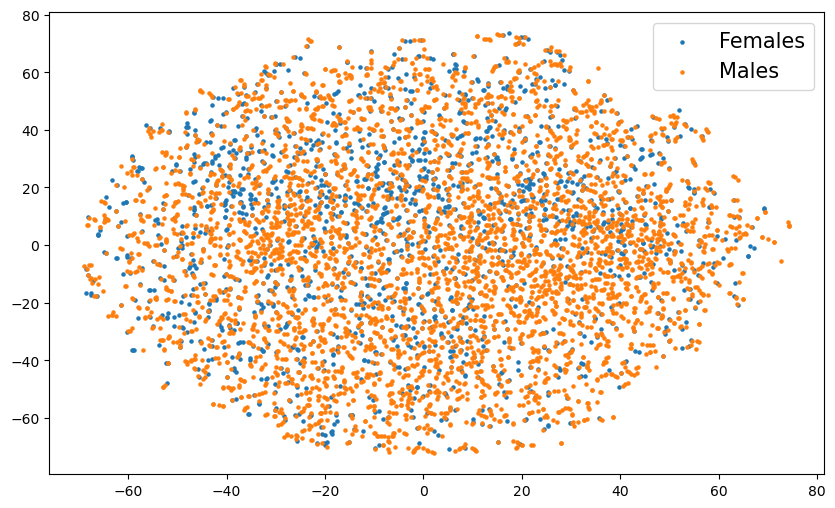

In [9]:
plt.figure(figsize=(10,6))
points1=U_tsne[np.where(users_table['gender']=='F')]
plt.scatter(points1[:,0],points1[:,1],s=5,label='Females')
points2=U_tsne[np.where(users_table['gender']=='M')]
plt.scatter(points2[:,0],points2[:,1],s=5,label='Males')
plt.legend(fontsize=15)
plt.savefig('plots/tsne/gender.png')
plt.show()




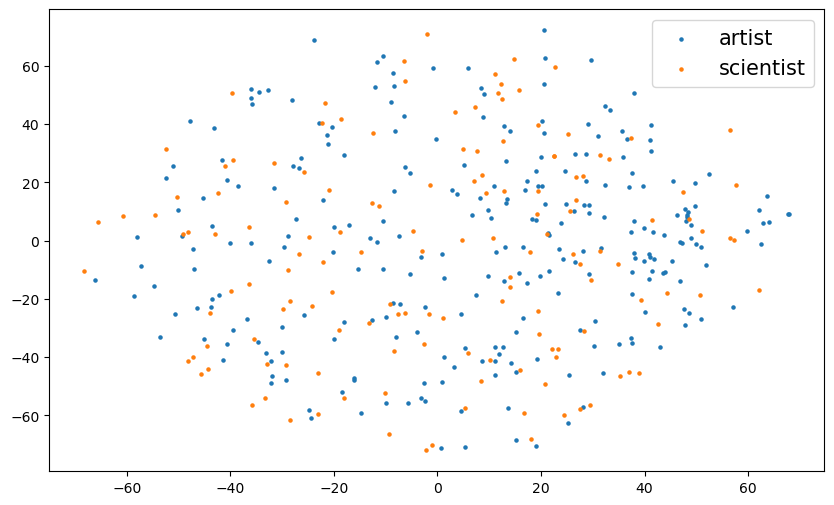

In [10]:
plt.figure(figsize=(10,6))
points1=U_tsne[np.where(users_table['occupation']==2)]
plt.scatter(points1[:,0],points1[:,1],s=5,label='artist')
points2=U_tsne[np.where(users_table['occupation']==15)]
plt.scatter(points2[:,0],points2[:,1],s=5,label='scientist')
plt.legend(fontsize=15)
plt.savefig('plots/tsne/occupation_scientists_vs_artists.png')
plt.show()

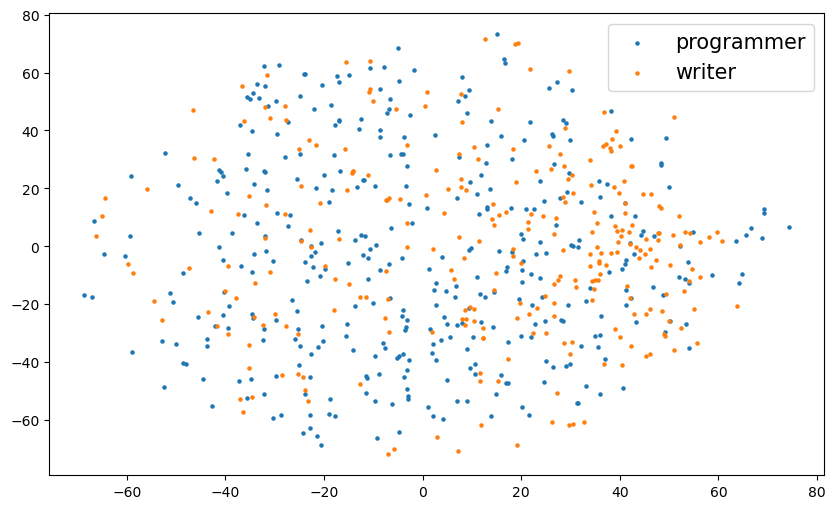

In [11]:
plt.figure(figsize=(10,6))
points1=U_tsne[np.where(users_table['occupation']==12)]
plt.scatter(points1[:,0],points1[:,1],s=5,label='programmer')
points2=U_tsne[np.where(users_table['occupation']==20)]
plt.scatter(points2[:,0],points2[:,1],s=5,label='writer')
plt.legend(fontsize=15)
plt.savefig('plots/tsne/occupation_programmer_vs_writer.png')
plt.show()

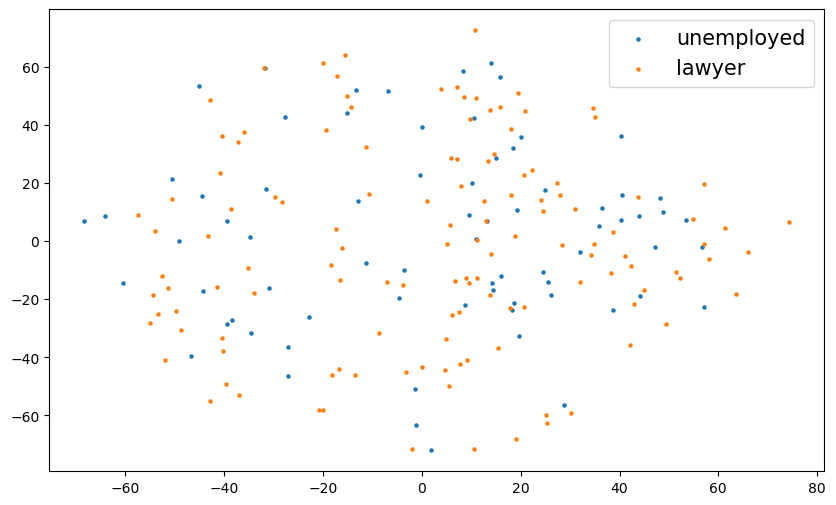

In [12]:
plt.figure(figsize=(10,6))
points1=U_tsne[np.where(users_table['occupation']==19)]
plt.scatter(points1[:,0],points1[:,1],s=5,label='unemployed')
points2=U_tsne[np.where(users_table['occupation']==11)]
plt.scatter(points2[:,0],points2[:,1],s=5,label='lawyer')
plt.legend(fontsize=15)
plt.savefig('plots/tsne/occupation_unemployed_vs_lawyer.png')
plt.show()

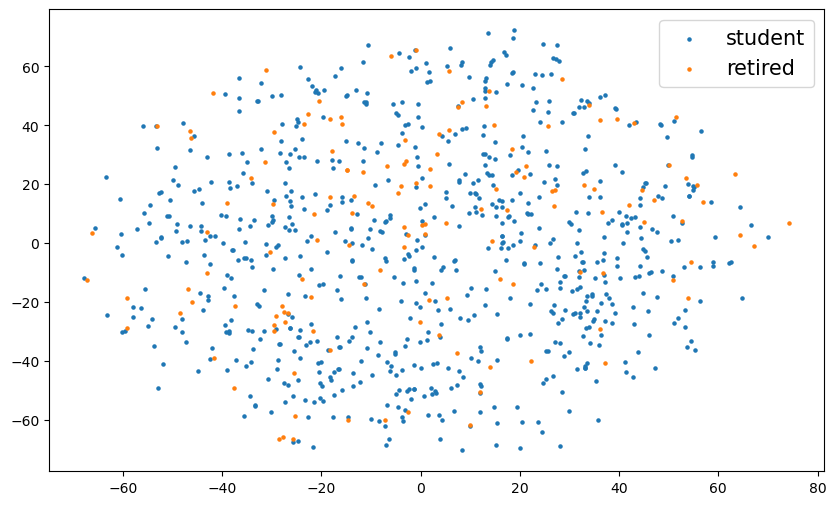

In [13]:
plt.figure(figsize=(10,6))
points1=U_tsne[np.where(users_table['occupation']==4)]
plt.scatter(points1[:,0],points1[:,1],s=5,label='student')
points2=U_tsne[np.where(users_table['occupation']==13)]
plt.scatter(points2[:,0],points2[:,1],s=5,label='retired')
plt.legend(fontsize=15)
plt.savefig('plots/tsne/occupation_student_vs_retired.png')
plt.show()

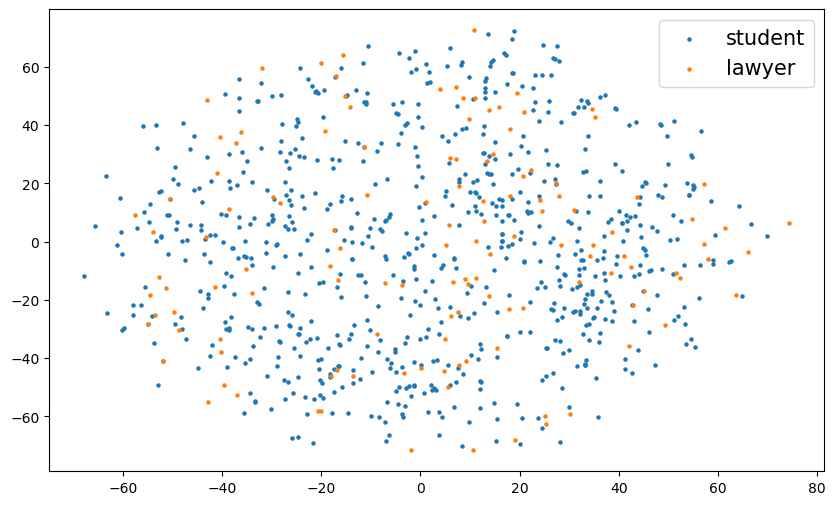

In [14]:
plt.figure(figsize=(10,6))
points1=U_tsne[np.where(users_table['occupation']==4)]
plt.scatter(points1[:,0],points1[:,1],s=5,label='student')
points2=U_tsne[np.where(users_table['occupation']==11)]
plt.scatter(points2[:,0],points2[:,1],s=5,label='lawyer')
plt.legend(fontsize=15)
plt.savefig('plots/tsne/occupation_student_vs_lawyer.png')
plt.show()

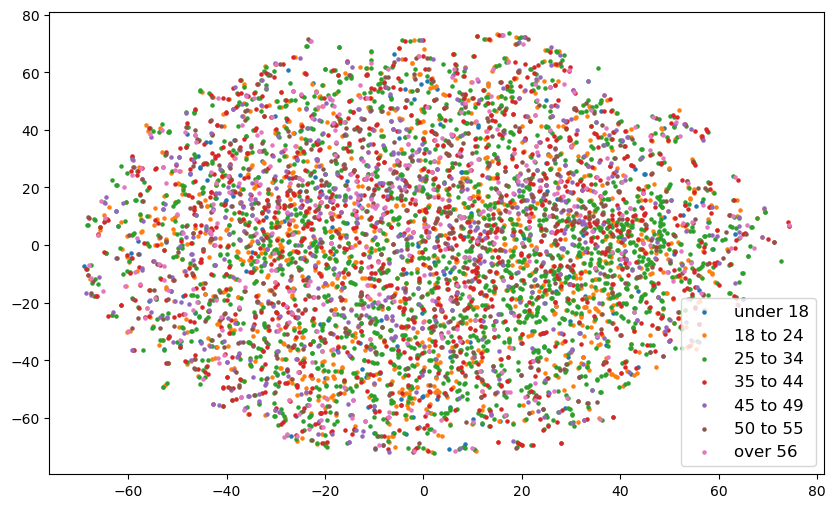

In [15]:
plt.figure(figsize=(10,6))
points1=U_tsne[np.where(users_table['age']==1)]
plt.scatter(points1[:,0],points1[:,1],s=5,label='under 18')
points2=U_tsne[np.where(users_table['age']==18)]
plt.scatter(points2[:,0],points2[:,1],s=5,label='18 to 24')
points3=U_tsne[np.where(users_table['age']==25)]
plt.scatter(points3[:,0],points3[:,1],s=5,label='25 to 34')
points1=U_tsne[np.where(users_table['age']==35)]
plt.scatter(points1[:,0],points1[:,1],s=5,label='35 to 44')
points2=U_tsne[np.where(users_table['age']==45)]
plt.scatter(points2[:,0],points2[:,1],s=5,label='45 to 49')
points3=U_tsne[np.where(users_table['age']==50)]
plt.scatter(points3[:,0],points3[:,1],s=5,label='50 to 55')
points1=U_tsne[np.where(users_table['age']==56)]
plt.scatter(points1[:,0],points1[:,1],s=5,label='over 56')


plt.legend(fontsize=12)
plt.savefig('plots/tsne/ages.png')
plt.show()


In [16]:
list_action=[]
for i in range(len(movies_table)):
    for j in range(len(movies_table['movie_genre'].iloc[i])):
        if movies_table['movie_genre'].iloc[i][j]=='Action':
            list_action.append(i)

            
            
list_comedy=[]
for i in range(len(movies_table)):
    for j in range(len(movies_table['movie_genre'].iloc[i])):
        if movies_table['movie_genre'].iloc[i][j]=='Comedy':
            list_comedy.append(i)

            
list_drama=[]
for i in range(len(movies_table)):
    for j in range(len(movies_table['movie_genre'].iloc[i])):
        if movies_table['movie_genre'].iloc[i][j]=='Drama':
            list_drama.append(i)
            
            
list_horror=[]
for i in range(len(movies_table)):
    for j in range(len(movies_table['movie_genre'].iloc[i])):
        if movies_table['movie_genre'].iloc[i][j]=='Horror':
            list_horror.append(i)
            
list_romantic=[]
for i in range(len(movies_table)):
    for j in range(len(movies_table['movie_genre'].iloc[i])):
        if movies_table['movie_genre'].iloc[i][j]=='Romance':
            list_romantic.append(i)

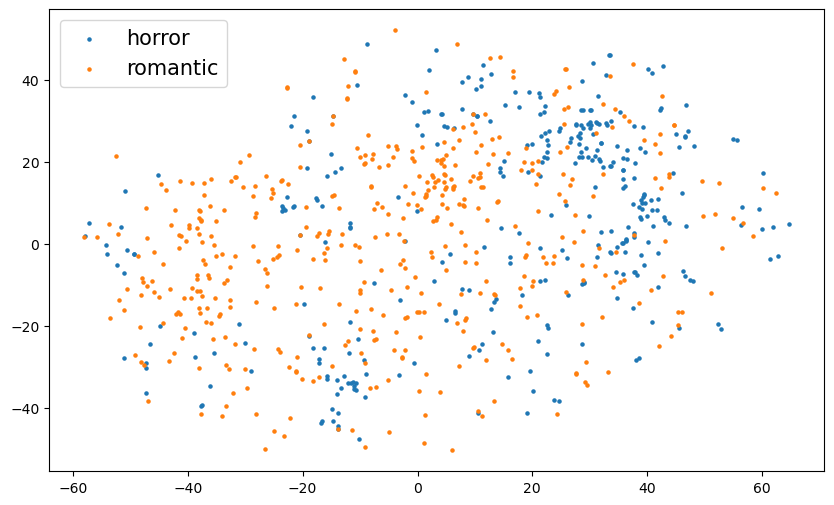

In [17]:
plt.figure(figsize=(10,6))
points1=M_tsne[list_action]
#plt.scatter(points1[:,0],points1[:,1],s=5,label='action')
points2=M_tsne[list_comedy]
#plt.scatter(points2[:,0],points2[:,1],s=5,label='comedy')
points3=M_tsne[list_drama]
#plt.scatter(points3[:,0],points3[:,1],s=5,label='drama')
points4=M_tsne[list_horror]
plt.scatter(points4[:,0],points4[:,1],s=5,label='horror')
points5=M_tsne[list_romantic]
plt.scatter(points5[:,0],points5[:,1],s=5,label='romantic')
plt.legend(fontsize=15)
plt.savefig('plots/tsne/genre.png')
plt.show()

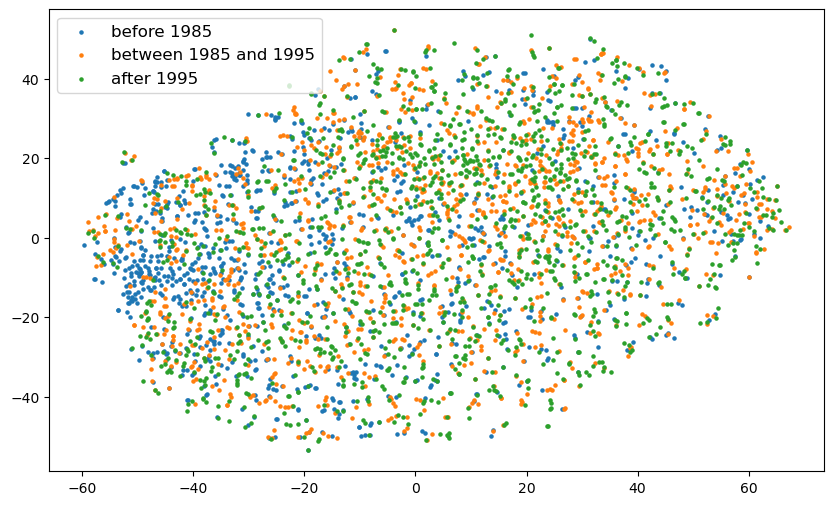

In [18]:
plt.figure(figsize=(10,6))
points1=M_tsne[np.where(movies_table['year']<=1985)]
plt.scatter(points1[:,0],points1[:,1],s=5,label='before 1985')
points2=M_tsne[np.where((movies_table['year']>1985) & (movies_table['year']<=1995))]
plt.scatter(points2[:,0],points2[:,1],s=5,label='between 1985 and 1995')
points3=M_tsne[np.where(movies_table['year']>1995)]
plt.scatter(points3[:,0],points3[:,1],s=5,label='after 1995')
plt.legend(fontsize=12)
plt.savefig('plots/tsne/movieage.png')
plt.show()

# PCA

In [19]:
from sklearn.decomposition import PCA

In [20]:
initial_t = time.time()
U_pca = PCA(n_components=2).fit_transform(U)

M_pca = PCA(n_components=2).fit_transform(M)



#initial_t = time.time()
print('PCA time', time.time() - initial_t)

PCA time 0.02402019500732422


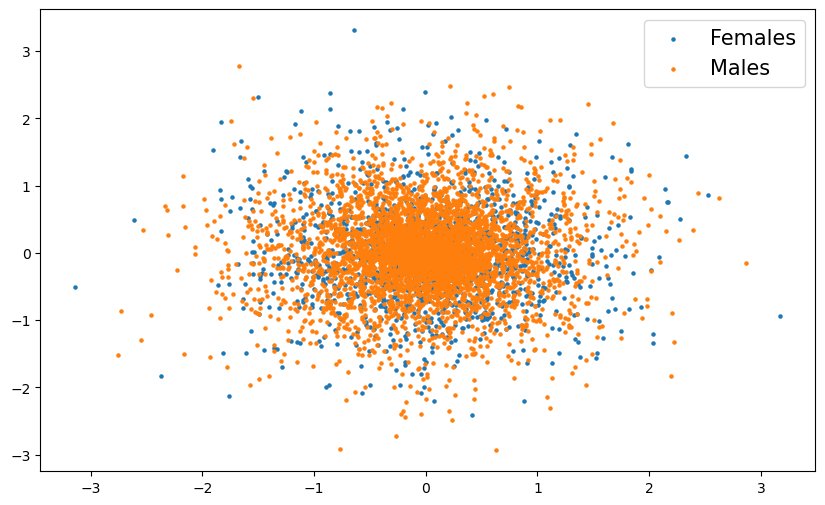

In [21]:
plt.figure(figsize=(10,6))
points1=U_pca[np.where(users_table['gender']=='F')]
plt.scatter(points1[:,0],points1[:,1],s=5,label='Females')
points2=U_pca[np.where(users_table['gender']=='M')]
plt.scatter(points2[:,0],points2[:,1],s=5,label='Males')
plt.legend(fontsize=15)
plt.savefig('plots/pca/gender.png')
plt.show()




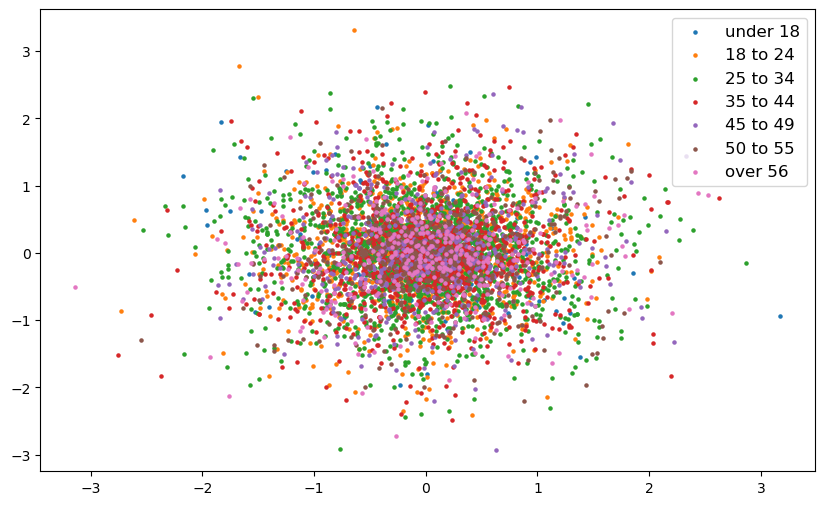

In [22]:
plt.figure(figsize=(10,6))
points1=U_pca[np.where(users_table['age']==1)]
plt.scatter(points1[:,0],points1[:,1],s=5,label='under 18')
points2=U_pca[np.where(users_table['age']==18)]
plt.scatter(points2[:,0],points2[:,1],s=5,label='18 to 24')
points3=U_pca[np.where(users_table['age']==25)]
plt.scatter(points3[:,0],points3[:,1],s=5,label='25 to 34')
points1=U_pca[np.where(users_table['age']==35)]
plt.scatter(points1[:,0],points1[:,1],s=5,label='35 to 44')
points2=U_pca[np.where(users_table['age']==45)]
plt.scatter(points2[:,0],points2[:,1],s=5,label='45 to 49')
points3=U_pca[np.where(users_table['age']==50)]
plt.scatter(points3[:,0],points3[:,1],s=5,label='50 to 55')
points1=U_pca[np.where(users_table['age']==56)]
plt.scatter(points1[:,0],points1[:,1],s=5,label='over 56')


plt.legend(fontsize=12)
plt.savefig('plots/pca/ages.png')
plt.show()


In [23]:
list_action=[]
for i in range(len(movies_table)):
    for j in range(len(movies_table['movie_genre'].iloc[i])):
        if movies_table['movie_genre'].iloc[i][j]=='Action':
            list_action.append(i)

            
            
list_comedy=[]
for i in range(len(movies_table)):
    for j in range(len(movies_table['movie_genre'].iloc[i])):
        if movies_table['movie_genre'].iloc[i][j]=='Comedy':
            list_comedy.append(i)

            
list_drama=[]
for i in range(len(movies_table)):
    for j in range(len(movies_table['movie_genre'].iloc[i])):
        if movies_table['movie_genre'].iloc[i][j]=='Drama':
            list_drama.append(i)
            
            
list_horror=[]
for i in range(len(movies_table)):
    for j in range(len(movies_table['movie_genre'].iloc[i])):
        if movies_table['movie_genre'].iloc[i][j]=='Horror':
            list_horror.append(i)
            
list_romantic=[]
for i in range(len(movies_table)):
    for j in range(len(movies_table['movie_genre'].iloc[i])):
        if movies_table['movie_genre'].iloc[i][j]=='Romance':
            list_romantic.append(i)

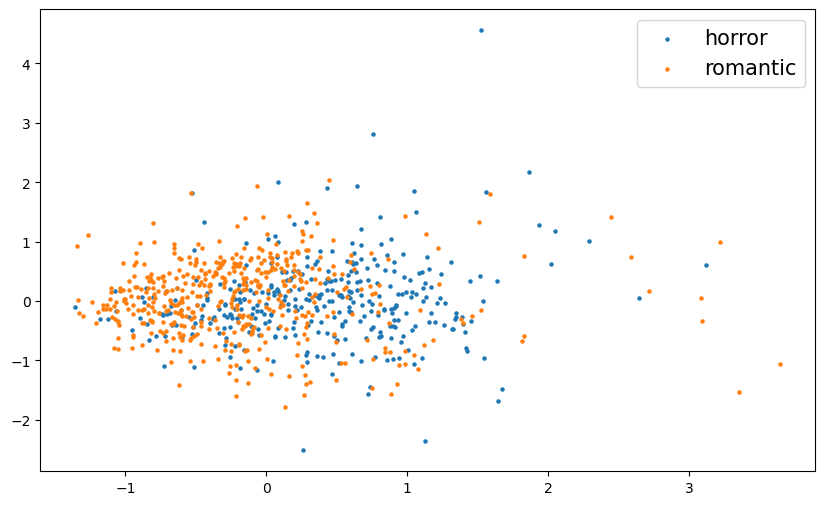

In [24]:
plt.figure(figsize=(10,6))
points1=M_pca[list_action]
#plt.scatter(points1[:,0],points1[:,1],s=5,label='action')
points2=M_pca[list_comedy]
#plt.scatter(points2[:,0],points2[:,1],s=5,label='comedy')
points3=M_pca[list_drama]
#plt.scatter(points3[:,0],points3[:,1],s=5,label='drama')
points4=M_pca[list_horror]
plt.scatter(points4[:,0],points4[:,1],s=5,label='horror')
points5=M_pca[list_romantic]
plt.scatter(points5[:,0],points5[:,1],s=5,label='romantic')
plt.legend(fontsize=15)
plt.savefig('plots/pca/genre.png')
plt.show()

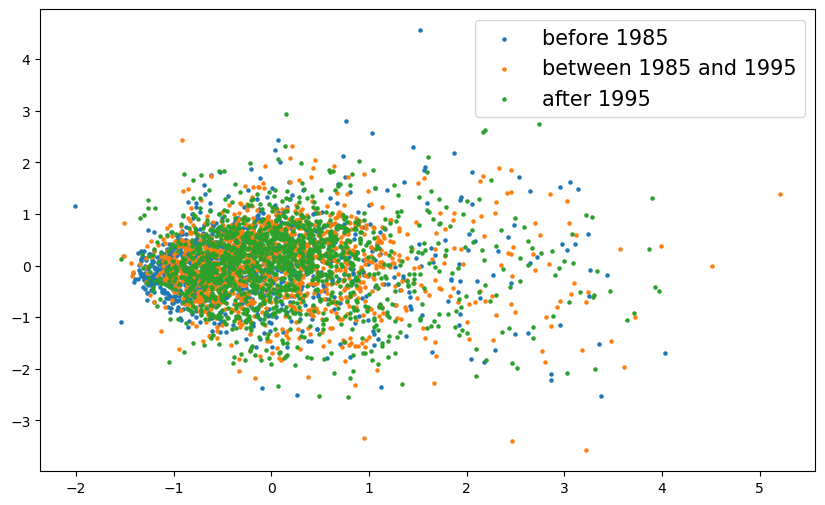

In [25]:
plt.figure(figsize=(10,6))
points1=M_pca[np.where(movies_table['year']<=1985)]
plt.scatter(points1[:,0],points1[:,1],s=5,label='before 1985')
points2=M_pca[np.where((movies_table['year']>1985) & (movies_table['year']<=1995))]
plt.scatter(points2[:,0],points2[:,1],s=5,label='between 1985 and 1995')
points3=M_pca[np.where(movies_table['year']>1995)]
plt.scatter(points3[:,0],points3[:,1],s=5,label='after 1995')
plt.legend(fontsize=15)
plt.savefig('plots/pca/movieage.png')
plt.show()

# UMAP

In [26]:
import umap
reducer = umap.UMAP()

In [40]:
initial_t = time.time()
U_umap = reducer.fit_transform(U)

M_umap = reducer.fit_transform(M)



print('UMAP time', time.time() - initial_t)

UMAP time 15.489716291427612


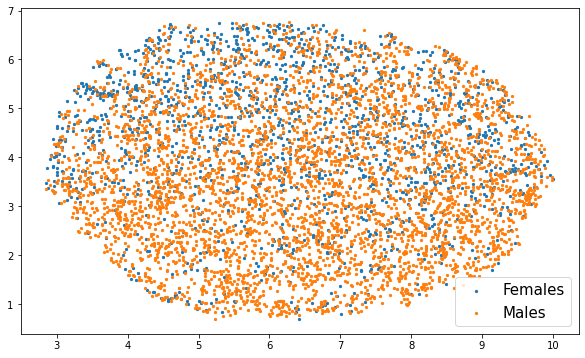

In [28]:
plt.figure(figsize=(10,6))
points1=U_umap[np.where(users_table['gender']=='F')]
plt.scatter(points1[:,0],points1[:,1],s=5,label='Females')
points2=U_umap[np.where(users_table['gender']=='M')]
plt.scatter(points2[:,0],points2[:,1],s=5,label='Males')
plt.legend(fontsize=15)
plt.savefig('plots/umap/gender.png')
plt.show()




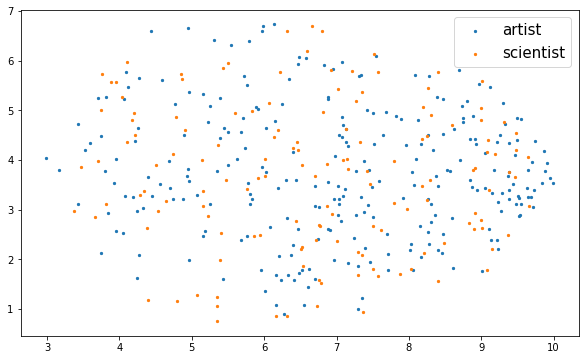

In [29]:
plt.figure(figsize=(10,6))
points1=U_umap[np.where(users_table['occupation']==2)]
plt.scatter(points1[:,0],points1[:,1],s=5,label='artist')
points2=U_umap[np.where(users_table['occupation']==15)]
plt.scatter(points2[:,0],points2[:,1],s=5,label='scientist')
plt.legend(fontsize=15)
plt.savefig('plots/umap/occupation_scientists_vs_artists.png')
plt.show()

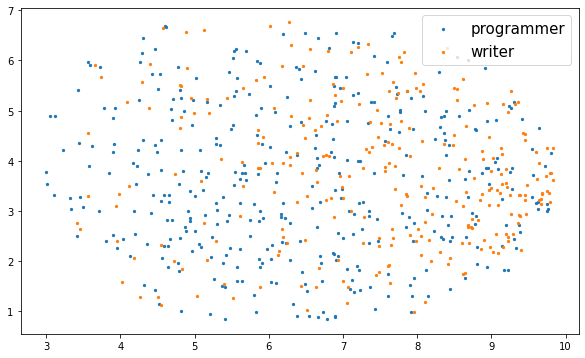

In [30]:
plt.figure(figsize=(10,6))
points1=U_umap[np.where(users_table['occupation']==12)]
plt.scatter(points1[:,0],points1[:,1],s=5,label='programmer')
points2=U_umap[np.where(users_table['occupation']==20)]
plt.scatter(points2[:,0],points2[:,1],s=5,label='writer')
plt.legend(fontsize=15)
plt.savefig('plots/umap/occupation_programmer_vs_writer.png')
plt.show()

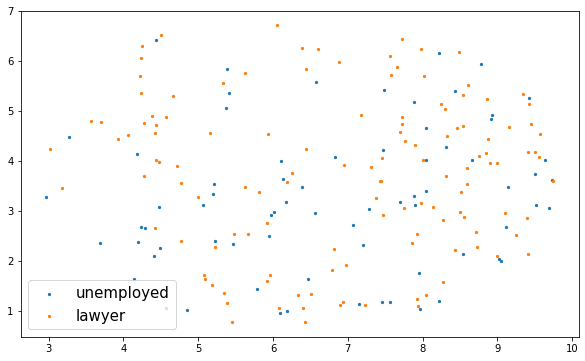

In [31]:
plt.figure(figsize=(10,6))
points1=U_umap[np.where(users_table['occupation']==19)]
plt.scatter(points1[:,0],points1[:,1],s=5,label='unemployed')
points2=U_umap[np.where(users_table['occupation']==11)]
plt.scatter(points2[:,0],points2[:,1],s=5,label='lawyer')
plt.legend(fontsize=15)
plt.savefig('plots/umap/occupation_unemployed_vs_lawyer.png')
plt.show()

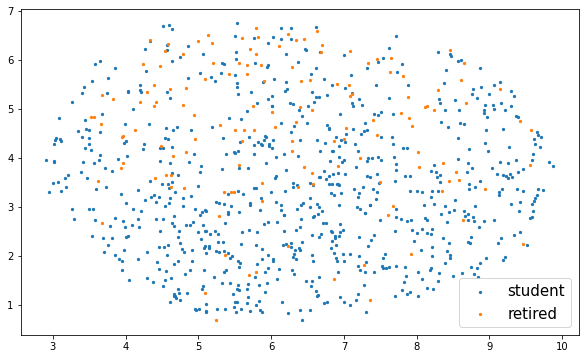

In [32]:
plt.figure(figsize=(10,6))
points1=U_umap[np.where(users_table['occupation']==4)]
plt.scatter(points1[:,0],points1[:,1],s=5,label='student')
points2=U_umap[np.where(users_table['occupation']==13)]
plt.scatter(points2[:,0],points2[:,1],s=5,label='retired')
plt.legend(fontsize=15)
plt.savefig('plots/umap/occupation_student_vs_retired.png')
plt.show()

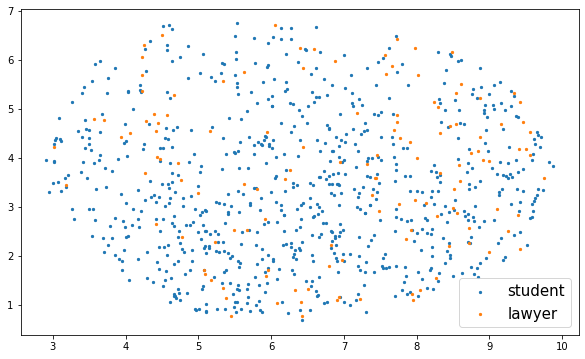

In [33]:
plt.figure(figsize=(10,6))
points1=U_umap[np.where(users_table['occupation']==4)]
plt.scatter(points1[:,0],points1[:,1],s=5,label='student')
points2=U_umap[np.where(users_table['occupation']==11)]
plt.scatter(points2[:,0],points2[:,1],s=5,label='lawyer')
plt.legend(fontsize=15)
plt.savefig('plots/umap/occupation_student_vs_lawyer.png')
plt.show()

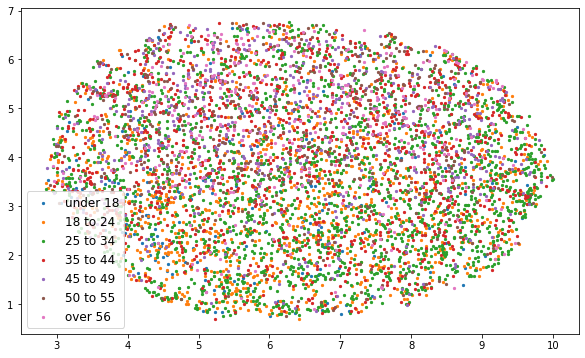

In [34]:
plt.figure(figsize=(10,6))
points1=U_umap[np.where(users_table['age']==1)]
plt.scatter(points1[:,0],points1[:,1],s=5,label='under 18')
points2=U_umap[np.where(users_table['age']==18)]
plt.scatter(points2[:,0],points2[:,1],s=5,label='18 to 24')
points3=U_umap[np.where(users_table['age']==25)]
plt.scatter(points3[:,0],points3[:,1],s=5,label='25 to 34')
points1=U_umap[np.where(users_table['age']==35)]
plt.scatter(points1[:,0],points1[:,1],s=5,label='35 to 44')
points2=U_umap[np.where(users_table['age']==45)]
plt.scatter(points2[:,0],points2[:,1],s=5,label='45 to 49')
points3=U_umap[np.where(users_table['age']==50)]
plt.scatter(points3[:,0],points3[:,1],s=5,label='50 to 55')
points1=U_umap[np.where(users_table['age']==56)]
plt.scatter(points1[:,0],points1[:,1],s=5,label='over 56')


plt.legend(fontsize=12)
plt.savefig('plots/umap/ages.png')
plt.show()


In [35]:
list_action=[]
for i in range(len(movies_table)):
    for j in range(len(movies_table['movie_genre'].iloc[i])):
        if movies_table['movie_genre'].iloc[i][j]=='Action':
            list_action.append(i)

            
            
list_comedy=[]
for i in range(len(movies_table)):
    for j in range(len(movies_table['movie_genre'].iloc[i])):
        if movies_table['movie_genre'].iloc[i][j]=='Comedy':
            list_comedy.append(i)

            
list_drama=[]
for i in range(len(movies_table)):
    for j in range(len(movies_table['movie_genre'].iloc[i])):
        if movies_table['movie_genre'].iloc[i][j]=='Drama':
            list_drama.append(i)
            
            
list_horror=[]
for i in range(len(movies_table)):
    for j in range(len(movies_table['movie_genre'].iloc[i])):
        if movies_table['movie_genre'].iloc[i][j]=='Horror':
            list_horror.append(i)
            
list_romantic=[]
for i in range(len(movies_table)):
    for j in range(len(movies_table['movie_genre'].iloc[i])):
        if movies_table['movie_genre'].iloc[i][j]=='Romance':
            list_romantic.append(i)

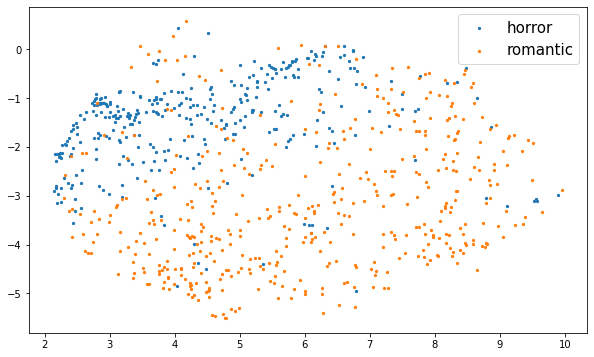

In [36]:
plt.figure(figsize=(10,6))
points1=M_umap[list_action]
#plt.scatter(points1[:,0],points1[:,1],s=5,label='action')
points2=M_umap[list_comedy]
#plt.scatter(points2[:,0],points2[:,1],s=5,label='comedy')
points3=M_umap[list_drama]
#plt.scatter(points3[:,0],points3[:,1],s=5,label='drama')
points4=M_umap[list_horror]
plt.scatter(points4[:,0],points4[:,1],s=5,label='horror')
points5=M_umap[list_romantic]
plt.scatter(points5[:,0],points5[:,1],s=5,label='romantic')
plt.legend(fontsize=15)
plt.savefig('plots/umap/genre.png')
plt.show()

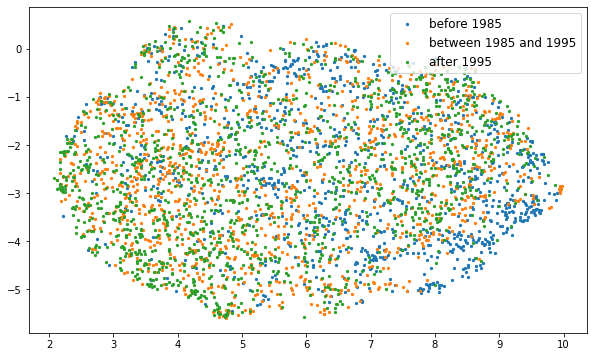

In [37]:
plt.figure(figsize=(10,6))
points1=M_umap[np.where(movies_table['year']<=1985)]
plt.scatter(points1[:,0],points1[:,1],s=5,label='before 1985')
points2=M_umap[np.where((movies_table['year']>1985) & (movies_table['year']<=1995))]
plt.scatter(points2[:,0],points2[:,1],s=5,label='between 1985 and 1995')
points3=M_umap[np.where(movies_table['year']>1995)]
plt.scatter(points3[:,0],points3[:,1],s=5,label='after 1995')
plt.legend(fontsize=12)
plt.savefig('plots/umap/movieage.png')
plt.show()